Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else.

Age: 18 to 60 years old

Gender: Female or Male

Department: Research & Development, Sales, Human Resources.

BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel.

DistanceFromHome: Distance between the company and their home in miles.

MonthlyIncome: Employees' numeric monthly income.

MaritalStatus: Married, Single, Divorced.

Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'.

EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other.

EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc

JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

OverTime: Whether they work overtime or not.

NumCompaniesWorked: Number of companies they worked for before joinging IBM.

PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'.

YearsAtCompany: Years they worked for IBM.

WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.

YearsSinceLastPromotion: Years passed since their last promotion.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [108]:
hrdata=pd.read_csv('HR_attrition.csv')
hrdata.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33.0,Yes,Travel_Frequently,NaN,3.0,Life Sciences,1,Male,3,1,Research Scientist,1.0,3348.0,1,Yes,11,3,10
1,NaN,Yes,Travel_Rarely,Sales,4.0,Medical,4,Male,1,3,Sales Executive,4.0,NaN,1,No,11,3,14


In [109]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
Age                        1430 non-null float64
Attrition                  1580 non-null object
BusinessTravel             1480 non-null object
Department                 1405 non-null object
DistanceFromHome           1400 non-null float64
EducationField             1580 non-null object
EnvironmentSatisfaction    1580 non-null int64
Gender                     1580 non-null object
JobInvolvement             1580 non-null int64
JobLevel                   1580 non-null int64
JobRole                    1580 non-null object
JobSatisfaction            1540 non-null float64
MonthlyIncome              1460 non-null float64
NumCompaniesWorked         1580 non-null int64
OverTime                   1580 non-null object
PercentSalaryHike          1580 non-null int64
PerformanceRating          1580 non-null int64
YearsAtCompany             1580 non-null int64
dtypes: float64(4), int64(7), ob

In [110]:
#1. Missing Value Treatment
hrdata.isnull().sum()/len(hrdata)*100

Age                         9.493671
Attrition                   0.000000
BusinessTravel              6.329114
Department                 11.075949
DistanceFromHome           11.392405
EducationField              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             2.531646
MonthlyIncome               7.594937
NumCompaniesWorked          0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
PerformanceRating           0.000000
YearsAtCompany              0.000000
dtype: float64

In [9]:
# Age Column

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

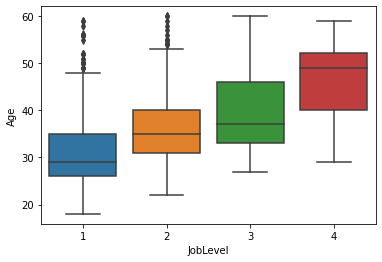

In [10]:
sb.boxplot(x=hrdata['JobLevel'],y=hrdata['Age'])

In [114]:
hrdata.groupby('JobLevel')['Age'].agg(np.median)

JobLevel
1    29.0
2    35.0
3    37.0
4    49.0
Name: Age, dtype: float64

In [11]:
hrdata.groupby('JobLevel')['Age'].transform('median')

0       29.0
1       37.0
2       29.0
3       35.0
4       37.0
        ... 
1575    37.0
1576    49.0
1577    29.0
1578    35.0
1579    35.0
Name: Age, Length: 1580, dtype: float64

In [111]:
hrdata['Age']=hrdata['Age'].fillna(hrdata.groupby('JobLevel')['Age'].transform('median'))

In [112]:
hrdata

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33.0,Yes,Travel_Frequently,NaN,3.0,Life Sciences,1,Male,3,1,Research Scientist,1.0,3348.0,1,Yes,11,3,10
1,37.0,Yes,Travel_Rarely,Sales,4.0,Medical,4,Male,1,3,Sales Executive,4.0,NaN,1,No,11,3,14
2,40.0,Yes,Travel_Rarely,Research & Development,9.0,Life Sciences,4,Male,3,1,Laboratory Technician,1.0,2018.0,3,No,14,3,5
3,42.0,No,Travel_Rarely,Research & Development,NaN,Medical,2,Female,4,2,Research Scientist,2.0,2372.0,6,Yes,16,3,1
4,43.0,No,Travel_Frequently,Research & Development,27.0,Life Sciences,3,Female,3,3,Manufacturing Director,1.0,10820.0,8,No,11,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,28.0,Yes,Non-Travel,Research & Development,24.0,Technical Degree,2,Male,2,3,Healthcare Representative,1.0,8722.0,1,No,12,3,10
1576,48.0,No,Travel_Rarely,Research & Development,1.0,Life Sciences,4,Female,2,4,Manager,1.0,15402.0,7,No,11,3,3
1577,30.0,Yes,Travel_Rarely,Sales,9.0,Medical,2,Male,3,1,Sales Representative,4.0,1081.0,1,No,13,3,1
1578,31.0,No,Travel_Frequently,Research & Development,1.0,Life Sciences,3,Female,3,2,Manufacturing Director,1.0,4148.0,1,No,12,3,4


In [13]:
# Monthly Income 

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

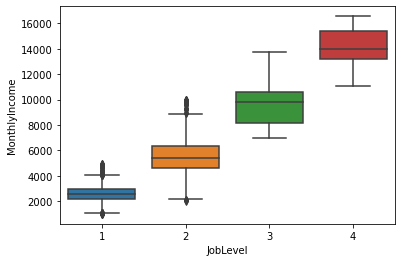

In [14]:
sb.boxplot(x=hrdata['JobLevel'],y=hrdata['MonthlyIncome'])

In [116]:
hrdata['MonthlyIncome']=hrdata['MonthlyIncome'].fillna(hrdata.groupby('JobLevel')['MonthlyIncome'].transform('median'))

In [117]:
# Business Travel

In [118]:
hrdata['BusinessTravel'].value_counts()

Travel_Rarely        1046
Travel_Frequently     313
Non-Travel            121
Name: BusinessTravel, dtype: int64

In [119]:
hrdata['BusinessTravel']=hrdata['BusinessTravel'].fillna(hrdata['BusinessTravel'].mode()[0])

In [120]:
# Department

In [121]:
hrdata['Department'].value_counts(normalize=True)

Research & Development    0.605694
Sales                     0.350178
Human Resources           0.044128
Name: Department, dtype: float64

In [122]:
hrdata.groupby(['Department'])['MonthlyIncome'].median()

Department
Human Resources           2741.0
Research & Development    3408.0
Sales                     5422.0
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

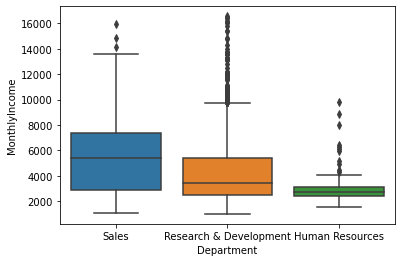

In [123]:
sb.boxplot(x='Department',y='MonthlyIncome',data=hrdata)

In [128]:
ind=hrdata[hrdata['Department'].isnull()].index
for i in ind:
    if (hrdata.loc[i,'MonthlyIncome'] <2900):
        hrdata.loc[i,'Department']='Human Resources'
    elif (hrdata.loc[i,'MonthlyIncome'] > 5200):
        hrdata.loc[i,'Department']='Sales'
    else:
        hrdata.loc[i,'Department']='Research & Development'

In [58]:
# Distance From Home

In [129]:
hrdata['DistanceFromHome']=hrdata['DistanceFromHome'].fillna(-999)

In [130]:
# JobSatisfaction

In [131]:
hrdata['JobSatisfaction'].value_counts(normalize=True)

3.0    0.311688
4.0    0.285065
1.0    0.213636
2.0    0.189610
Name: JobSatisfaction, dtype: float64

In [132]:
hrdata['JobSatisfaction']=hrdata['JobSatisfaction'].fillna(hrdata['JobSatisfaction'].mode()[0])

In [133]:
hrdata.isnull().sum().sum()

0

In [134]:
hrdata.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33.0,Yes,Travel_Frequently,Research & Development,3.0,Life Sciences,1,Male,3,1,Research Scientist,1.0,3348.0,1,Yes,11,3,10
1,37.0,Yes,Travel_Rarely,Sales,4.0,Medical,4,Male,1,3,Sales Executive,4.0,9824.0,1,No,11,3,14
2,40.0,Yes,Travel_Rarely,Research & Development,9.0,Life Sciences,4,Male,3,1,Laboratory Technician,1.0,2018.0,3,No,14,3,5
3,42.0,No,Travel_Rarely,Research & Development,-999.0,Medical,2,Female,4,2,Research Scientist,2.0,2372.0,6,Yes,16,3,1
4,43.0,No,Travel_Frequently,Research & Development,27.0,Life Sciences,3,Female,3,3,Manufacturing Director,1.0,10820.0,8,No,11,3,8


### Encoding

In [65]:
# Numerical and Categorical Data

In [135]:
num_hrdata=hrdata[['Age','DistanceFromHome',
                  'MonthlyIncome','NumCompaniesWorked',
                  'PercentSalaryHike','YearsAtCompany']]

In [138]:

cat_hrdata=hrdata.select_dtypes(exclude=np.number)

In [139]:
cat_hrdata['Attrition']=cat_hrdata['Attrition'].replace({'Yes':1,'No':0})

In [140]:
cat_hrdata=pd.get_dummies(cat_hrdata,columns=['OverTime'],drop_first=True)

In [137]:
cat_hrdata['JobRole'].nunique()

9

In [141]:
#Mean Encoding/Target Encoding

cat_hrdata['JobRole']=hrdata.groupby('JobRole')['MonthlyIncome'].transform('mean')


In [142]:
cat_hrdata.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime_Yes
0,1,Travel_Frequently,Research & Development,Life Sciences,Male,3051.666159,1
1,1,Travel_Rarely,Sales,Medical,Male,7021.412371,0
2,1,Travel_Rarely,Research & Development,Life Sciences,Male,2991.250765,0
3,0,Travel_Rarely,Research & Development,Medical,Female,3051.666159,1
4,0,Travel_Frequently,Research & Development,Life Sciences,Female,7044.810219,0


In [143]:
cat_hrdata=pd.get_dummies(cat_hrdata,columns=['BusinessTravel','Department','Gender'],drop_first=True)

In [144]:
#Frequency Encoding
tab=cat_hrdata['EducationField'].value_counts(normalize=True)
cat_hrdata['EducationField']=cat_hrdata['EducationField'].map(tab)

In [145]:
final_data=pd.concat([num_hrdata,cat_hrdata],axis=1)

In [146]:
final_data=pd.concat([final_data,hrdata[['JobInvolvement',
                                        'JobLevel',
                                        'JobSatisfaction']]],axis=1)

In [147]:
final_data.head(2)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,Attrition,EducationField,JobRole,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Gender_Male,JobInvolvement,JobLevel,JobSatisfaction
0,33.0,3.0,3348.0,1,11,10,1,0.392405,3051.666159,1,1,0,1,0,1,3,1,1.0
1,37.0,4.0,9824.0,1,11,14,1,0.294304,7021.412371,0,0,1,0,1,1,1,3,4.0


### Base Model

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [149]:
x=final_data.drop(columns=['Attrition'])
y = final_data['Attrition']

In [151]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [152]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [153]:
y_pred = model.predict(x_test)

In [155]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       211
           1       0.45      0.55      0.49       105

    accuracy                           0.62       316
   macro avg       0.60      0.61      0.60       316
weighted avg       0.65      0.62      0.63       316



### Different Model Performance

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import make_scorer

In [158]:
m1 = LogisticRegression()
m2 = DecisionTreeClassifier()
m3 = RandomForestClassifier()
m4 = KNeighborsClassifier()
m5 = XGBClassifier()
m6 = GaussianNB()

In [160]:
model_name = ['LR','DT','RF','KNN','XG','NB']
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for name,model in zip(model_name,[m1,m2,m3,m4,m5,m6]):
    scores = cross_val_score(model,x,y,cv=kf,scoring='f1')
    per = np.mean(scores)
    bias = 1 - np.mean(scores)
    var = np.std(scores,ddof=1)/np.mean(scores)
    print(name,':', per,bias,var)

LR : 0.5309823310816952 0.46901766891830476 0.0802767023923621
DT : 0.8399450425034134 0.1600549574965866 0.018409333325769228
RF : 0.9181099191575477 0.0818900808424523 0.02317420335456252
KNN : 0.6550575445532526 0.3449424554467474 0.06314519224087606
XG : 0.9090410762837541 0.09095892371624592 0.02155133401338027
NB : 0.6639609712912102 0.33603902870878977 0.01853297416179725


In [85]:
# Parameter Tuning - Random forest

In [162]:
est_count = [5,10,20,50,100,150,200]
max_depth = [5,10,15,20,25,30,35,40]

In [163]:
be= []
ve = []
model_info =[]
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for est in est_count:
    for depth in max_depth:
        model = RandomForestClassifier(n_estimators=est,max_depth=depth)
        scores = cross_val_score(model,x,y,cv=kf,scoring='f1')
        bias = 1 - np.mean(scores)
        var = np.std(scores,ddof=1)/np.mean(scores)
        be.append(bias)
        ve.append(var)
        model_info.append([est,depth])

In [166]:
no_model = len(model_info)
count = list(range(0,no_model))

In [171]:
be1 = pd.DataFrame(be)/sum(be)
ve1 = pd.DataFrame(ve)/sum(ve)

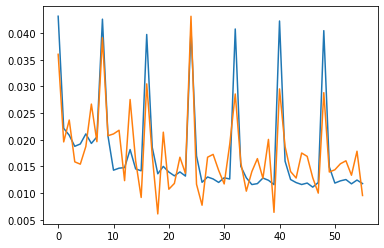

In [173]:
plt.plot(count,be1)
plt.plot(count,ve1)
plt.show()

In [174]:
model_info[47]

[150, 40]

In [178]:
be1.loc[47]

0    0.012002
Name: 47, dtype: float64

In [179]:
ve1.loc[47]

0    0.010016
Name: 47, dtype: float64

In [193]:
final_mod=RandomForestClassifier(max_depth=40,n_estimators=150)

In [194]:
final_mod.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=40, n_estimators=150)

In [195]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [196]:
confusion_matrix(ytest,ypred1)

array([[247,  17],
       [ 11, 199]], dtype=int64)

In [197]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       264
           1       0.92      0.95      0.93       210

    accuracy                           0.94       474
   macro avg       0.94      0.94      0.94       474
weighted avg       0.94      0.94      0.94       474



In [198]:
score = cross_val_score(final_mod, inp, out, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.9284068807381723 0.015669236688206287


In [180]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

params={'n_estimators': [5,10,20,50,100,150,200],
        #'max_features':['auto','sqrt','log2'],
        #'criterion':['gini','entropy'],
        'max_depth':[5,10,15,20,25,30,35,40]}

In [181]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1')

In [182]:
tun_mod=hyp_mod.fit(x,y)

In [183]:
tun_mod.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [184]:
tun_mod.best_score_

0.927633187071795

In [186]:
res=pd.DataFrame(tun_mod.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019546,0.004260,0.004996,0.001414,5,5,"{'max_depth': 5, 'n_estimators': 5}",0.689922,0.693878,0.655602,0.700787,0.684211,0.684880,0.015602,56
1,0.023266,0.002380,0.005372,0.001723,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.740157,0.706349,0.721569,0.748092,0.742857,0.731805,0.015556,54
2,0.040614,0.002691,0.006177,0.001159,5,20,"{'max_depth': 5, 'n_estimators': 20}",0.727273,0.768000,0.717131,0.702041,0.731343,0.729158,0.021895,55
3,0.099162,0.001935,0.008791,0.001159,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.729412,0.755020,0.761905,0.766284,0.768657,0.756255,0.014201,50
4,0.192662,0.007253,0.014560,0.002405,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.749035,0.737705,0.756972,0.750000,0.765152,0.751773,0.009106,52
5,0.289630,0.006016,0.019848,0.001334,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.730159,0.769841,0.764940,0.737255,0.772727,0.754984,0.017694,51
6,0.419088,0.086282,0.025326,0.001622,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.772201,0.753968,0.728745,0.740157,0.748092,0.748633,0.014502,53
7,0.015211,0.001546,0.003590,0.000489,10,5,"{'max_depth': 10, 'n_estimators': 5}",0.862191,0.914286,0.868056,0.858156,0.849315,0.870401,0.022774,48
8,0.027494,0.002789,0.004992,0.001113,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.878893,0.911661,0.864286,0.845070,0.863158,0.872614,0.022278,47
9,0.049461,0.002650,0.005791,0.001175,10,20,"{'max_depth': 10, 'n_estimators': 20}",0.889655,0.924188,0.898246,0.886525,0.896552,0.899033,0.013296,41


In [187]:
final_mod=RandomForestClassifier(**tun_mod.best_params_)

In [188]:
final_mod.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=25, n_estimators=150)

In [189]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [190]:
confusion_matrix(ytest,ypred1)

array([[246,  18],
       [ 14, 196]], dtype=int64)

In [191]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       264
           1       0.92      0.93      0.92       210

    accuracy                           0.93       474
   macro avg       0.93      0.93      0.93       474
weighted avg       0.93      0.93      0.93       474



In [192]:
score = cross_val_score(final_mod, inp, out, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.9255348558352423 0.016331427284243173


In [203]:
# Voting Classifier

In [199]:
est = (('RF',RandomForestClassifier(max_depth=40,n_estimators=150)),
      ('DT',DecisionTreeClassifier(max_depth=40)),
      ('XG',XGBClassifier()))
vc_model = VotingClassifier(est,voting='hard')

In [201]:
score = cross_val_score(vc_model,x,y,cv=kf,scoring='f1')

In [202]:
print(np.mean(score),np.std(score)/np.mean(score))

0.918124086568554 0.012419087127682887
